In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
import umap
import os
import pickle

/home/sainero/.conda/envs/style/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
umap_dimensions = [2]
predefined_seeds = [42, 7, 19, 23, 1, 100, 56, 77, 89, 33, 8, 
                    13, 5, 21, 34, 99, 67, 18, 50, 81, 45, 22, 74, 37, 58, 
                    90, 16, 11, 29, 85]


In [4]:
base_path = "../french/embeddings/"
dataset_folders = {
        # "B1_renard" : "B1_renard", 
        # "A1" : "A1_fr", 
        # "A2" : f"A2_fr/A2_{model_gen}_{author}_fr/", 
        # "B" : f"B_fr/B_{author}_fr"
        "Tuffery":"A1_fr", 
        "Proust": "B_fr/B_proust_fr",
        "Celine": "B_fr/B_celine_fr", 
        "Yourcenar":"B_fr/B_yourcenar_fr",
        "Proust_mistral": "A2_fr/A2_mistral_proust_fr",
        "Celine_mistral": "A2_fr/A2_mistral_celine_fr", 
        "Yourcenar_mistral":"A2_fr/A2_mistral_yourcenar_fr",
        "Proust_gemini": "A2_fr/A2_gemini_proust_fr",
        "Celine_gemini": "A2_fr/A2_gemini_celine_fr", 
        "Yourcenar_gemini":"A2_fr/A2_gemini_yourcenar_fr",
        "Proust_gpt": "A2_fr/A2_gpt_proust_fr",
        "Celine_gpt": "A2_fr/A2_gpt_celine_fr", 
        "Yourcenar_gpt":"A2_fr/A2_gpt_yourcenar_fr",
    }

In [5]:
def load_embeddings_from_pickle(embeddings_dir):
    try:
        with open(embeddings_dir, 'rb') as f:
            embeddings = pickle.load(f)
        return embeddings
    except FileNotFoundError as e:
        print(f"File not found: {embeddings_dir}")
        raise e

# xlm_roberta_large

In [6]:
model_name = "FacebookAI/xlm-roberta-large"

# Load the embeddings for each class
embeddings_dict, distances_dict = {}, {}
for class_name, folder in dataset_folders.items():
    safe_model_name = model_name.replace('/', '_').replace('\\', '_')
    embeddings_dir = os.path.join(base_path, folder, f"{safe_model_name}_embeddings.pkl")
    embeddings_dict[class_name] = load_embeddings_from_pickle(embeddings_dir)
    
    # Calculate distances from the centroid
    # _, distances = calculate_centroid_and_distances(embeddings_dict[class_name])
    # distances_dict[class_name] = distances

In [7]:
print(embeddings_dict.keys())

dict_keys(['Tuffery', 'Proust', 'Celine', 'Yourcenar', 'Proust_mistral', 'Celine_mistral', 'Yourcenar_mistral', 'Proust_gemini', 'Celine_gemini', 'Yourcenar_gemini', 'Proust_gpt', 'Celine_gpt', 'Yourcenar_gpt'])


In [8]:
embeddings_tuffery = embeddings_dict["Tuffery"]
embeddings_proust = embeddings_dict["Proust"]
embeddings_celine = embeddings_dict["Celine"]
embeddings_yourcenar = embeddings_dict["Yourcenar"]
embeddings_proust_gpt = embeddings_dict["Proust_gpt"]
embeddings_celine_gpt = embeddings_dict["Celine_gpt"]
embeddings_yourcenar_gpt = embeddings_dict["Yourcenar_gpt"]
embeddings_proust_mistral = embeddings_dict["Proust_mistral"]
embeddings_celine_mistral = embeddings_dict["Celine_mistral"]
embeddings_yourcenar_mistral = embeddings_dict["Yourcenar_mistral"]
embeddings_proust_gemini = embeddings_dict["Proust_gemini"]
embeddings_celine_gemini = embeddings_dict["Celine_gemini"]
embeddings_yourcenar_gemini = embeddings_dict["Yourcenar_gemini"]

In [9]:
for seed in predefined_seeds:
    reducer = umap.UMAP(n_components=2, random_state=seed, n_jobs=1)
    all_embeddings = np.concatenate((embeddings_tuffery, embeddings_proust, embeddings_celine, embeddings_yourcenar, 
                                        embeddings_proust_gpt, embeddings_celine_gpt, embeddings_yourcenar_gpt, 
                            embeddings_proust_mistral, embeddings_celine_mistral, embeddings_yourcenar_mistral, 
                            embeddings_proust_gemini, embeddings_celine_gemini, embeddings_yourcenar_gemini), axis=0)
    reducer.fit(all_embeddings)

In [10]:
transformed_tuffery = reducer.transform(embeddings_tuffery)
transformed_proust = reducer.transform(embeddings_proust)
transformed_celine = reducer.transform(embeddings_celine)
transformed_yourcenar = reducer.transform(embeddings_yourcenar)
transformed_proust_gpt = reducer.transform(embeddings_proust_gpt)
transformed_celine_gpt = reducer.transform(embeddings_celine_gpt)
transformed_yourcenar_gpt = reducer.transform(embeddings_yourcenar_gpt)
transformed_proust_mistral = reducer.transform(embeddings_proust_mistral)
transformed_celine_mistral = reducer.transform(embeddings_celine_mistral)
transformed_yourcenar_mistral = reducer.transform(embeddings_yourcenar_mistral)
transformed_proust_gemini = reducer.transform(embeddings_proust_gemini)
transformed_celine_gemini = reducer.transform(embeddings_celine_gemini)
transformed_yourcenar_gemini = reducer.transform(embeddings_yourcenar_gemini)

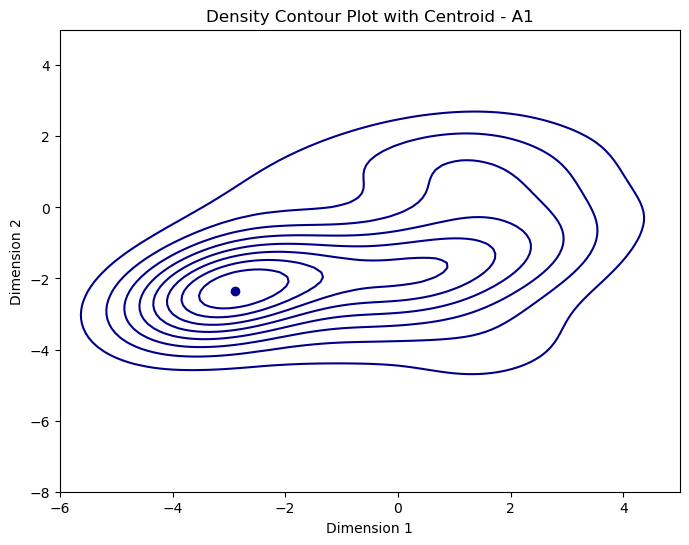

In [11]:
# Example: Random points for demonstration
# np.random.seed(0)
# x = np.random.normal(loc=0, scale=1.0, size=300)
# y = np.random.normal(loc=0, scale=1.0, size=300)
# points = np.vstack([x, y])

# xlm_roberta_large
x = transformed_tuffery[:,0]
y = transformed_tuffery[:,1]
points = np.vstack([x, y])

# KDE (Kernel Density Estimation)
kde = gaussian_kde(points)
# xmin, xmax = x.min() - 1, x.max() + 1
# ymin, ymax = y.min() - 1, y.max() + 1

# Create grid
xx, yy = np.mgrid[-6:5:100j, -8:5:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
density = kde(grid_coords).reshape(xx.shape)

# Compute centroid
# centroid_x, centroid_y = np.median(x), np.median(y)
max_idx = np.argmax(density)
centroid_x = xx.ravel()[max_idx]
centroid_y = yy.ravel()[max_idx]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
contours = ax.contour(xx, yy, density, levels=10, colors='darkblue')
# ax.clabel(contours, inline=True, fontsize=8)
ax.plot(centroid_x, centroid_y, 'o', c='darkblue')
ax.set_title("Density Contour Plot with Centroid - A1")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
# ax.scatter(x, y, s=10, alpha=0.3, label='Data')
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.legend()
plt.show()

### Proust Celine Yourcenar : B

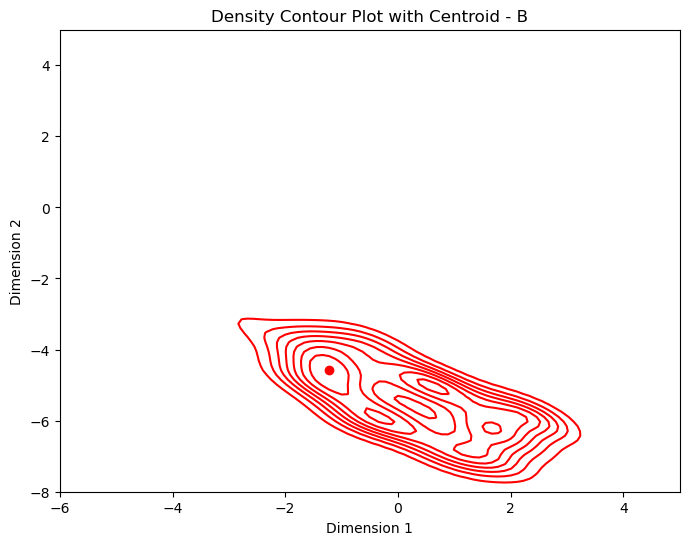

In [12]:
# xlm_roberta_large

transformed_B = np.vstack([transformed_proust, transformed_celine, transformed_yourcenar])

x = transformed_B[:,0]
y = transformed_B[:,1]
points = np.vstack([x, y])

# KDE (Kernel Density Estimation)
kde = gaussian_kde(points)
# xmin, xmax = x.min() - 1, x.max() + 1
# ymin, ymax = y.min() - 1, y.max() + 1

# Create grid
xx, yy = np.mgrid[-6:5:100j, -8:5:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
density = kde(grid_coords).reshape(xx.shape)

# Compute centroid
# centroid_x, centroid_y = np.median(x), np.median(y)
max_idx = np.argmax(density)
centroid_x = xx.ravel()[max_idx]
centroid_y = yy.ravel()[max_idx]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
contours = ax.contour(xx, yy, density, levels=10, colors='red')
# ax.clabel(contours, inline=True, fontsize=8)
ax.plot(centroid_x, centroid_y, 'o', c='red')
ax.set_title("Density Contour Plot with Centroid - B")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
# ax.scatter(x, y, s=10, alpha=0.3, label='Data')
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.legend()
plt.show()

### A2

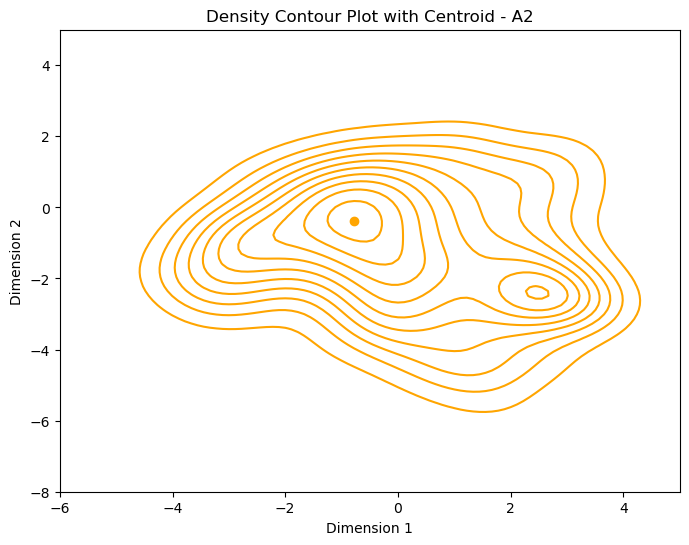

In [13]:
# xlm_roberta_large

transformed_A2 = np.vstack([transformed_proust_gpt ,transformed_celine_gpt ,transformed_proust_mistral ,transformed_celine_mistral,transformed_yourcenar_mistral ,transformed_proust_gemini ,transformed_celine_gemini ,transformed_yourcenar_gemini])

x = transformed_A2[:,0]
y = transformed_A2[:,1]
points = np.vstack([x, y])

# KDE (Kernel Density Estimation)
kde = gaussian_kde(points)
# xmin, xmax = x.min() - 1, x.max() + 1
# ymin, ymax = y.min() - 1, y.max() + 1

# Create grid
xx, yy = np.mgrid[-6:5:100j, -8:5:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
density = kde(grid_coords).reshape(xx.shape)

# Compute centroid
# centroid_x, centroid_y = np.median(x), np.median(y)
max_idx = np.argmax(density)
centroid_x = xx.ravel()[max_idx]
centroid_y = yy.ravel()[max_idx]

# Plot
fig, ax = plt.subplots(figsize=(8, 6))
contours = ax.contour(xx, yy, density, levels=10, colors='orange')
# ax.clabel(contours, inline=True, fontsize=8)
ax.plot(centroid_x, centroid_y, 'o', c='orange')
ax.set_title("Density Contour Plot with Centroid - A2")
ax.set_xlabel("Dimension 1")
ax.set_ylabel("Dimension 2")
# ax.scatter(x, y, s=10, alpha=0.3, label='Data')
# ax.set_xlim(xmin, xmax)
# ax.set_ylim(ymin, ymax)
# ax.legend()
plt.show()

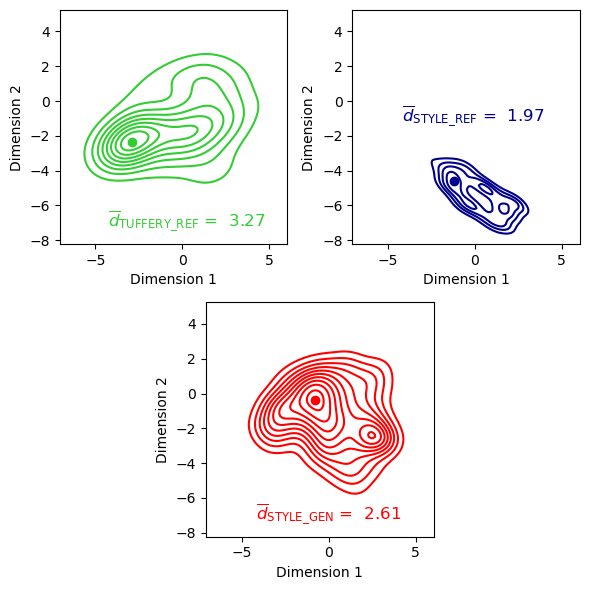

In [19]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


# creating grid for subplots
fig = plt.figure()
fig.set_figheight(6)
fig.set_figwidth(6)

# ax1 = plt.subplot2grid(shape=(7, 7), loc=(0, 2), colspan=3, rowspan=3)
# ax2 = plt.subplot2grid(shape=(7, 7), loc=(4, 0), colspan=3, rowspan=3)
# ax3 = plt.subplot2grid(shape=(7, 7), loc=(4, 4), colspan=3, rowspan=3)

ax1 = plt.subplot2grid(shape=(4, 4), loc=(2, 1), colspan=2, rowspan=2)
ax2 = plt.subplot2grid(shape=(4, 4), loc=(0, 0), colspan=2, rowspan=2)
ax3 = plt.subplot2grid(shape=(4, 4), loc=(0, 2), colspan=2, rowspan=2)


# Plot your figures

# A2 style_gen
transformed_A2 = np.vstack([transformed_proust_gpt ,transformed_celine_gpt ,transformed_proust_mistral ,transformed_celine_mistral,transformed_yourcenar_mistral ,transformed_proust_gemini ,transformed_celine_gemini ,transformed_yourcenar_gemini])
x = transformed_A2[:,0]
y = transformed_A2[:,1]
points = np.vstack([x, y])
# KDE (Kernel Density Estimation)
kde = gaussian_kde(points)
# Create grid
xx, yy = np.mgrid[-6:5:100j, -8:5:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
density = kde(grid_coords).reshape(xx.shape)
# Compute centroid
max_idx = np.argmax(density)
centroid_x = xx.ravel()[max_idx]
centroid_y = yy.ravel()[max_idx]

distances = np.sqrt((x - centroid_x)**2 + (y - centroid_y)**2)
mean_distance = np.mean(distances)

# Plot
contours = ax1.contour(xx, yy, density, levels=10, colors='red')
ax1.plot(centroid_x, centroid_y, 'o', c='red')
ax1.text(
    0.22, 0.15,
    r"$\overline{d}_{ \mathrm{STYLE\_GEN}}$"+f" =  {mean_distance:.2f}",
    transform=ax1.transAxes,
    fontsize=12,
    verticalalignment='top',
    color='red'
)
ax1.set_xlabel("Dimension 1")
ax1.set_ylabel("Dimension 2")
# ax1.set_title("Plot 1")
ax1.axis('equal')

# Tuffery
x = transformed_tuffery[:,0]
y = transformed_tuffery[:,1]
points = np.vstack([x, y])
# KDE (Kernel Density Estimation)
kde = gaussian_kde(points)
# Create grid
xx, yy = np.mgrid[-6:5:100j, -8:5:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
density = kde(grid_coords).reshape(xx.shape)
# Compute centroid
max_idx = np.argmax(density)
centroid_x = xx.ravel()[max_idx]
centroid_y = yy.ravel()[max_idx]

distances = np.sqrt((x - centroid_x)**2 + (y - centroid_y)**2)
mean_distance = np.mean(distances)

# Plot
contours = ax2.contour(xx, yy, density, levels=10, colors='limegreen')
# ax.clabel(contours, inline=True, fontsize=8)
ax2.plot(centroid_x, centroid_y, 'o', c='limegreen')
ax2.text(
    0.21, 0.15,
    r"$\overline{d}_{ \mathrm{TUFFERY\_REF}}$"+f" =  {mean_distance:.2f}",
    transform=ax2.transAxes,
    fontsize=12,
    verticalalignment='top',
    color='limegreen'
)
ax2.set_xlabel("Dimension 1")
ax2.set_ylabel("Dimension 2")
# ax2.set_title("Plot 2")
ax2.axis('equal')

# B : style_ref
transformed_B = np.vstack([transformed_proust, transformed_celine, transformed_yourcenar])
# transformed_B = transformed_celine
x = transformed_B[:,0]
y = transformed_B[:,1]
points = np.vstack([x, y])
# KDE (Kernel Density Estimation)
kde = gaussian_kde(points)
# Create grid
xx, yy = np.mgrid[-6:5:100j, -8:5:100j]
grid_coords = np.vstack([xx.ravel(), yy.ravel()])
density = kde(grid_coords).reshape(xx.shape)
# Compute centroid
max_idx = np.argmax(density)
centroid_x = xx.ravel()[max_idx]
centroid_y = yy.ravel()[max_idx]

distances = np.sqrt((x - centroid_x)**2 + (y - centroid_y)**2)
mean_distance = np.mean(distances)
# Plot
contours = ax3.contour(xx, yy, density, levels=4, colors='darkblue')
ax3.plot(centroid_x, centroid_y, 'o', c='darkblue')
ax3.set_xlabel("Dimension 1")
ax3.set_ylabel("Dimension 2")
# ax3.scatter(x, y, s=1)
ax3.text(
    0.22, 0.6,
    r"$\overline{d}_{ \mathrm{STYLE\_REF}}$"+f" =  {mean_distance:.2f}",
    transform=ax3.transAxes,
    fontsize=12,
    verticalalignment='top',
    color='darkblue', 
    weight='roman', 
    fontfamily='sans-serif'
)
# ax3.set_title("Plot 3")
ax3.axis('equal')

plt.tight_layout()
plt.show()

En bas orange bleu baisser rouge 
Changer noms d barre